In [1]:
from utils import iteration_logging
from cycles.graph_cycle_iterator import GraphCycleIterator
from graph_edge_iterator import GraphEdgeIterator
from tqdm.auto import tqdm


In [2]:
BUFFER_COUNT = 2
PRUNE_INTERVAL = 1_000
END_DATE = "2019-08-10"

In [3]:
def edge_generator():
    return GraphEdgeIterator(end_date=END_DATE, buffer_count=BUFFER_COUNT)


TOTAL_EDGES = len(list(edge_generator()))

In [4]:
def wrapped_edge_generator(log_stream):
    return tqdm(
        iteration_logging(
            edge_generator(),
            log_stream=log_stream
        ),
        total=TOTAL_EDGES
    )


def cycle_generator(omega, log_stream_edges=None, combine_seeds=True, track_history=False):
    return GraphCycleIterator(
        wrapped_edge_generator(log_stream_edges),
        omega,
        combine_seeds=combine_seeds,
        track_history=track_history
    )

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/551830 [00:00<?, ?it/s]

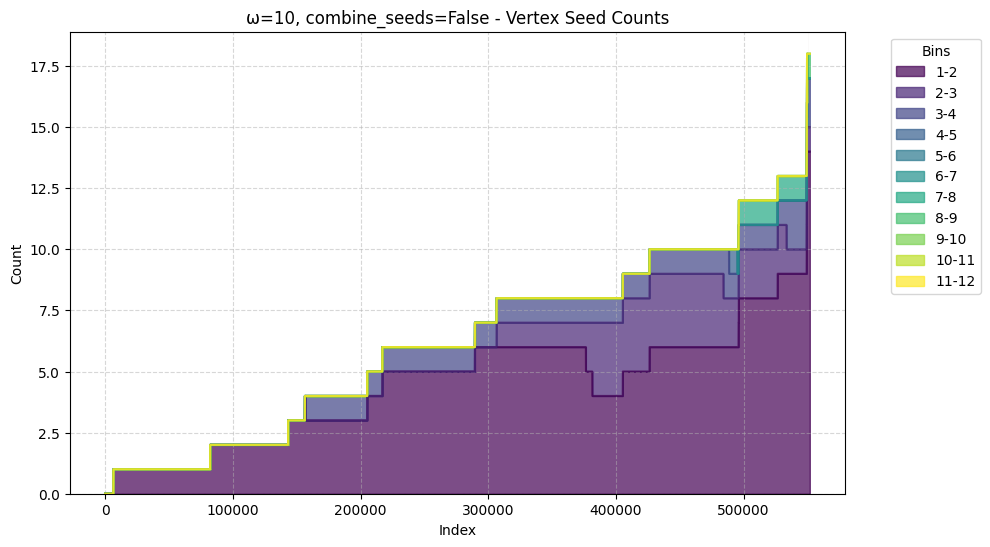

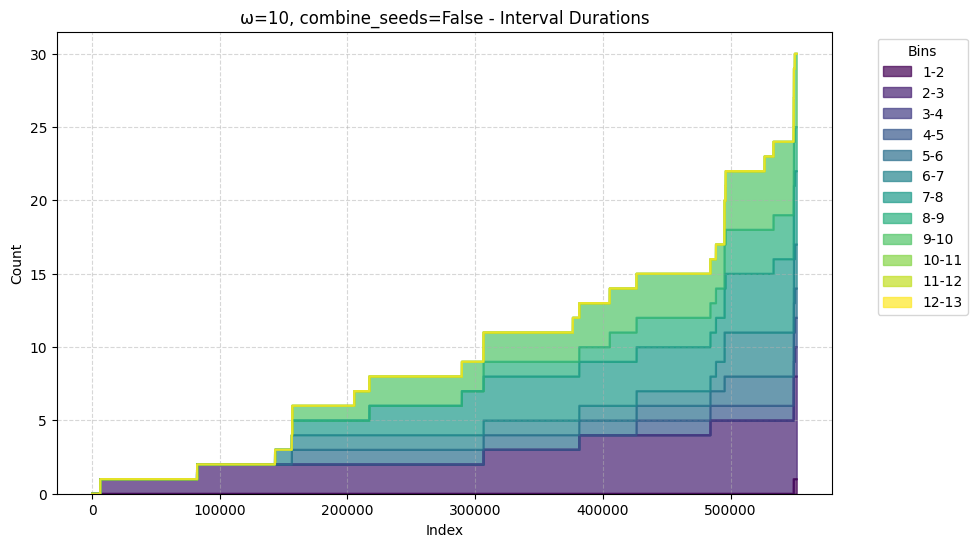

  0%|          | 0/551830 [00:00<?, ?it/s]

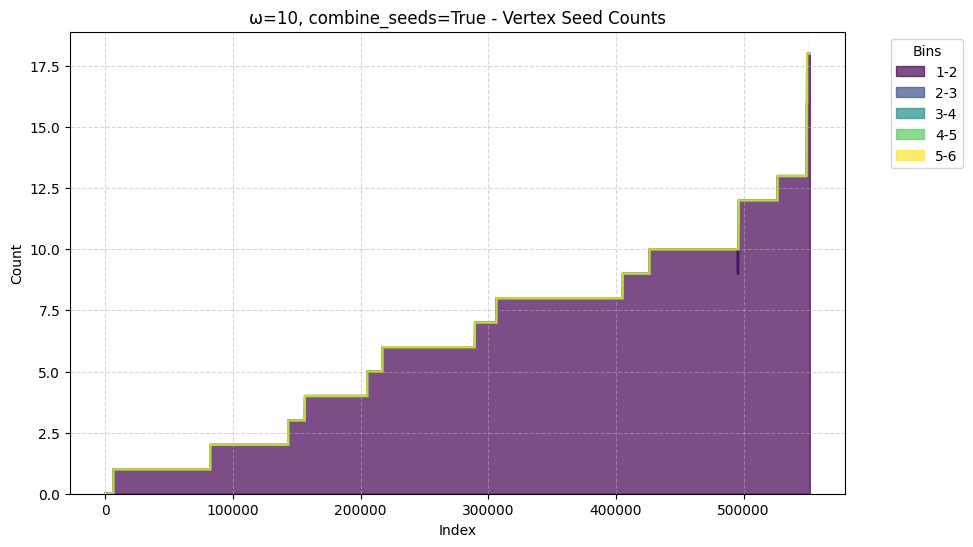

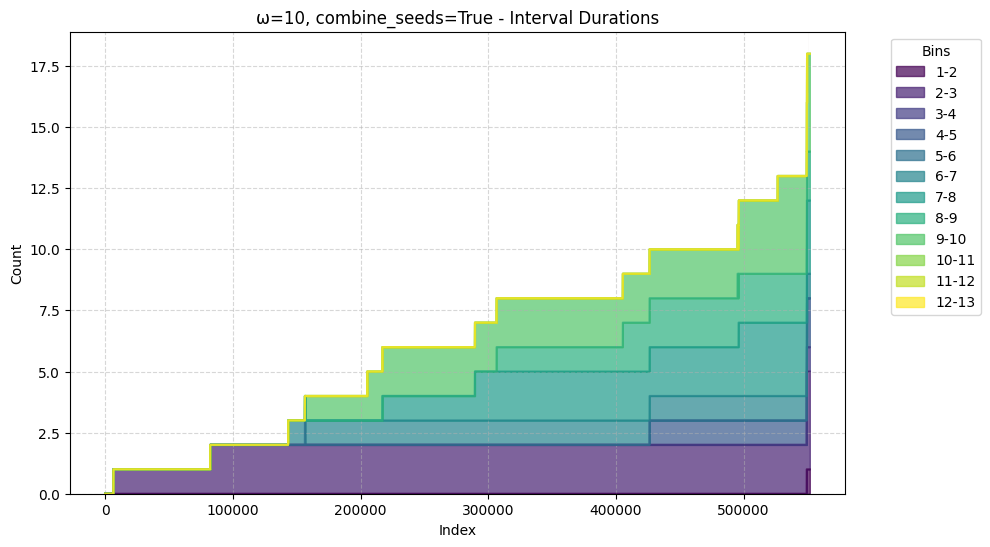

  0%|          | 0/551830 [00:00<?, ?it/s]

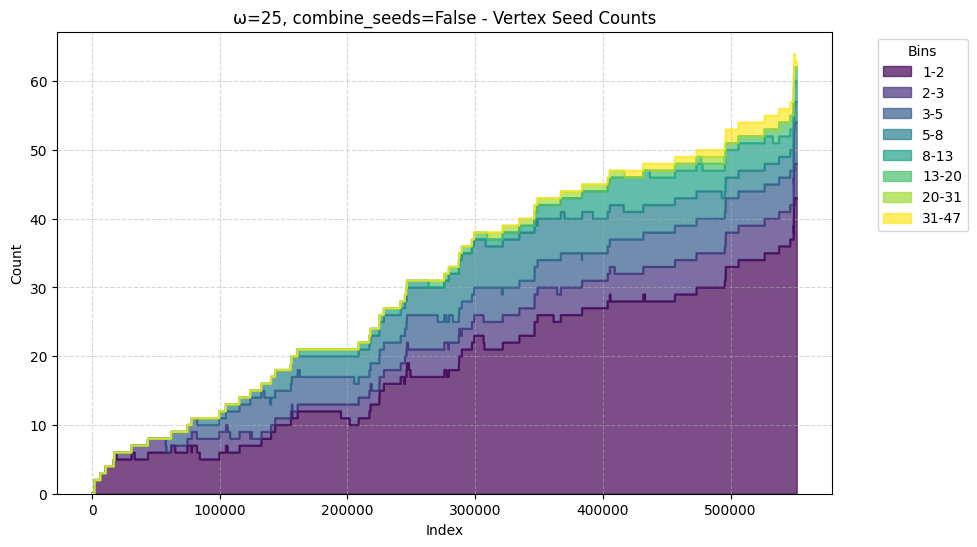

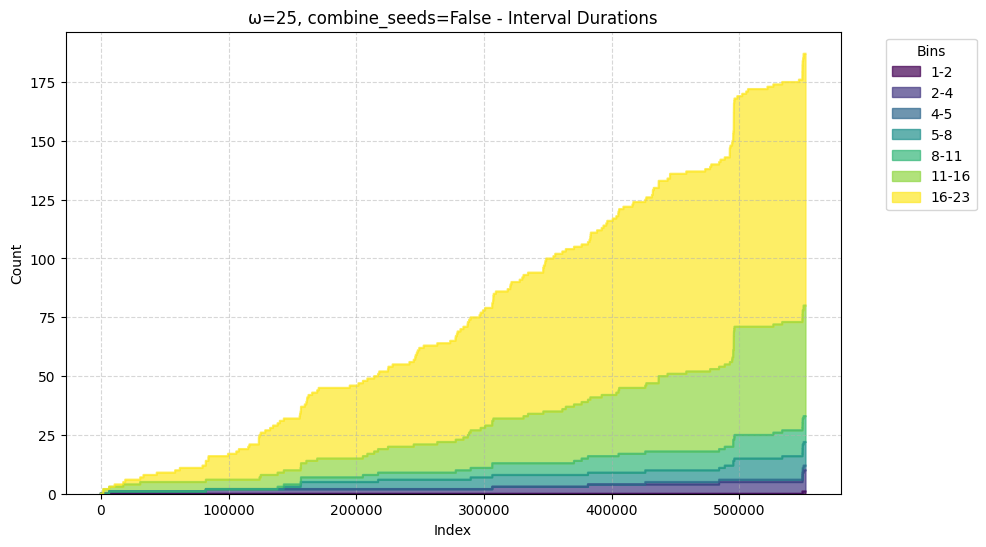

  0%|          | 0/551830 [00:00<?, ?it/s]

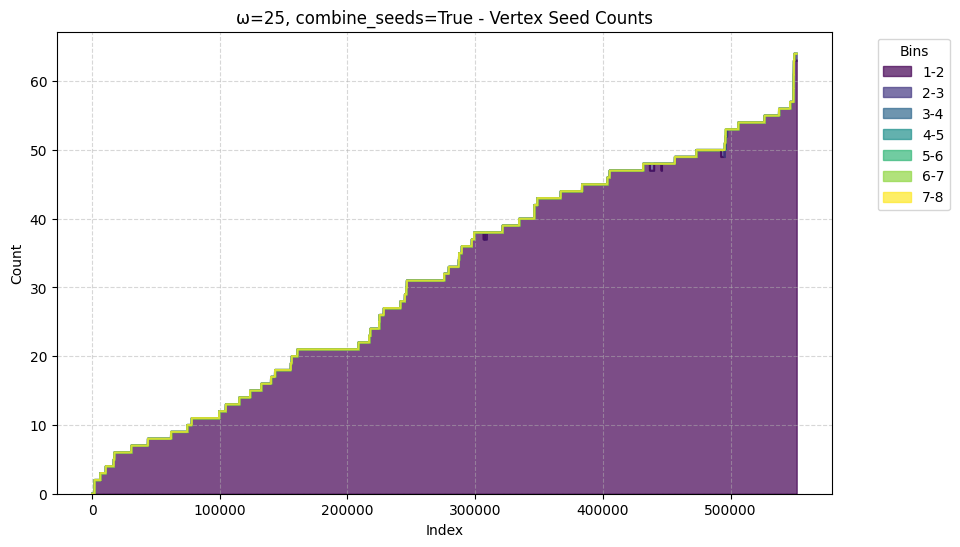

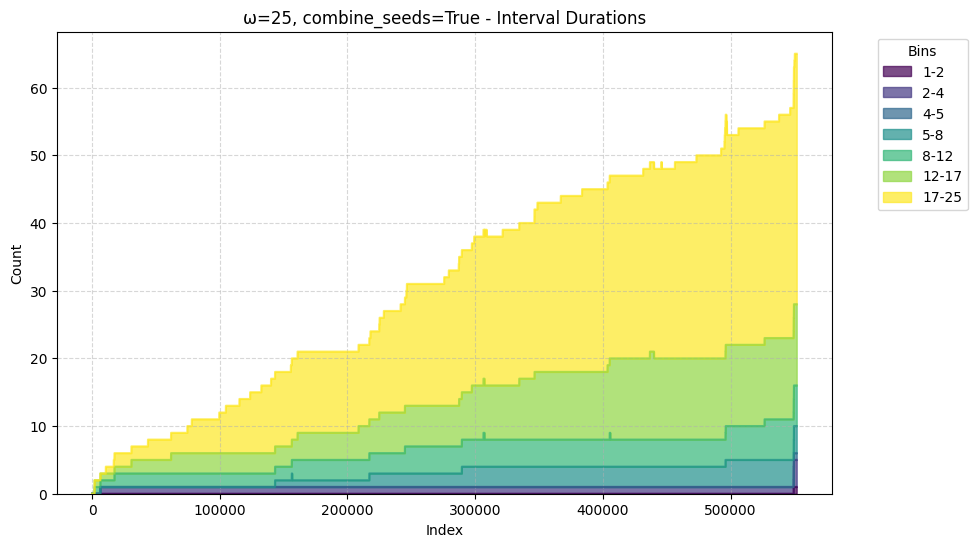

  0%|          | 0/551830 [00:00<?, ?it/s]

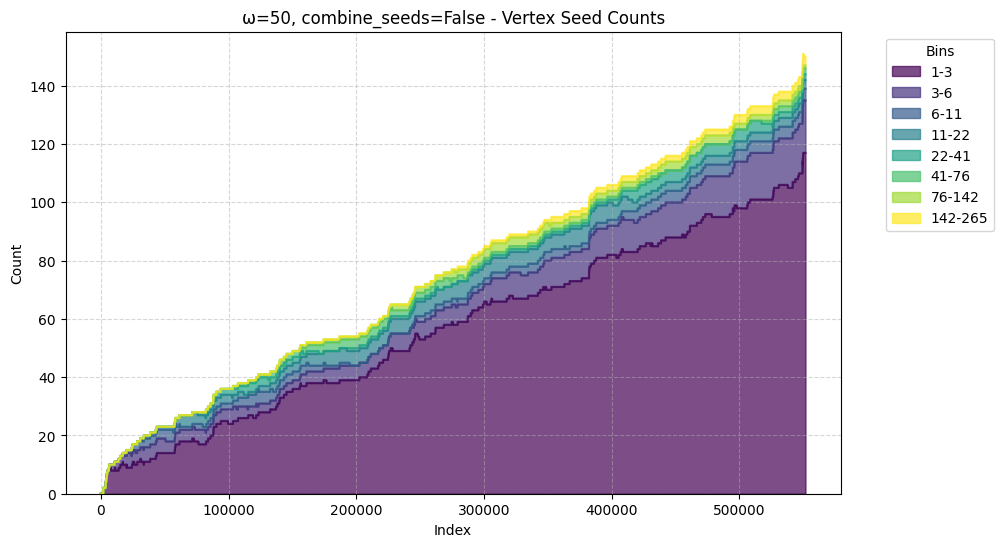

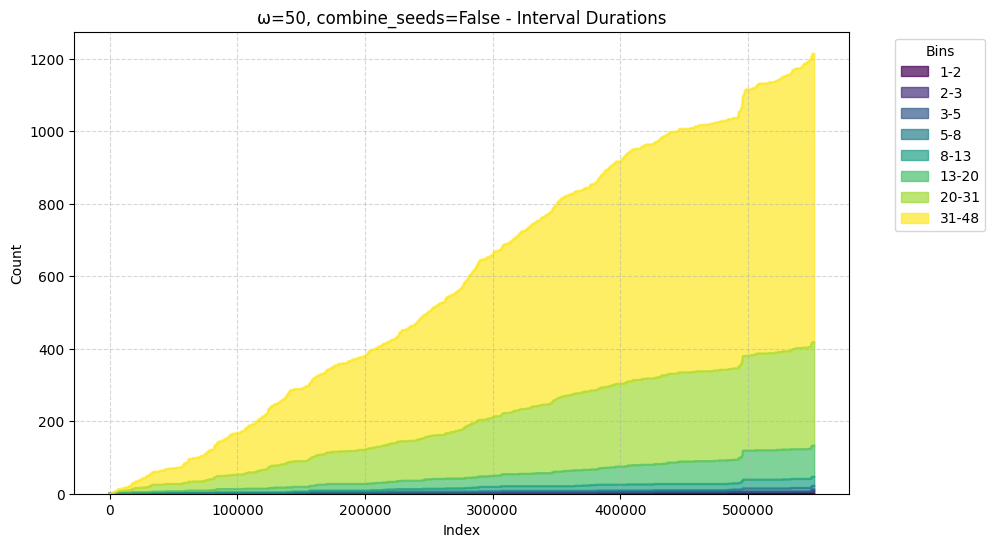

  0%|          | 0/551830 [00:00<?, ?it/s]

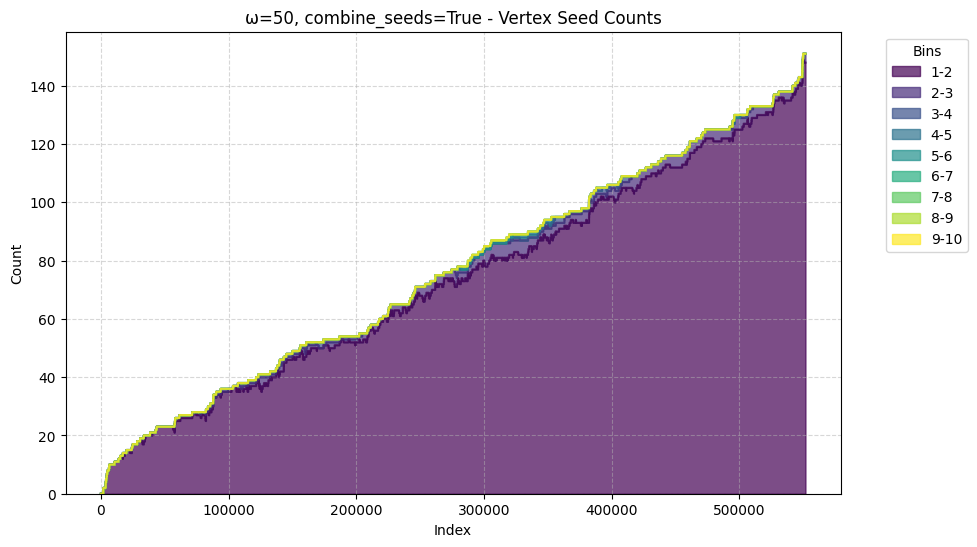

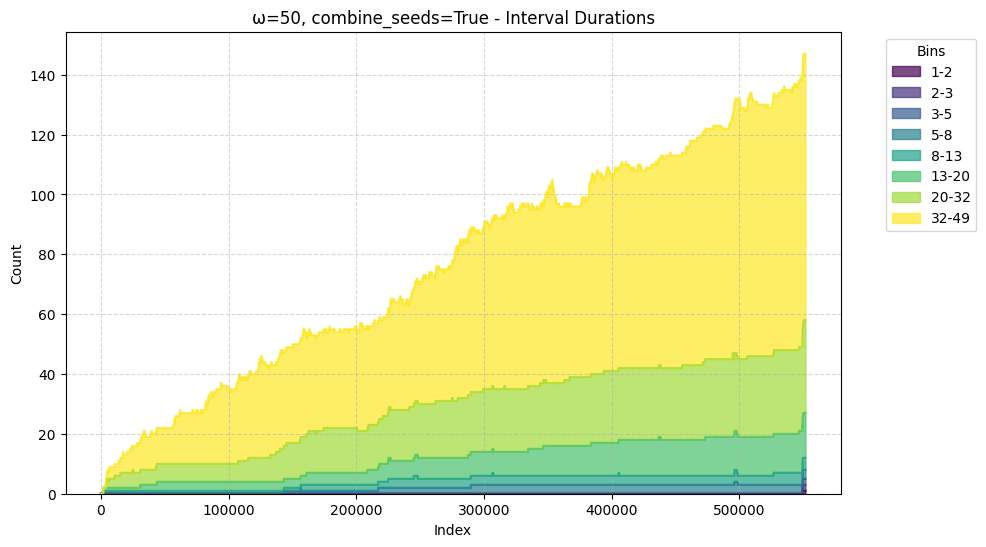

  0%|          | 0/551830 [00:00<?, ?it/s]

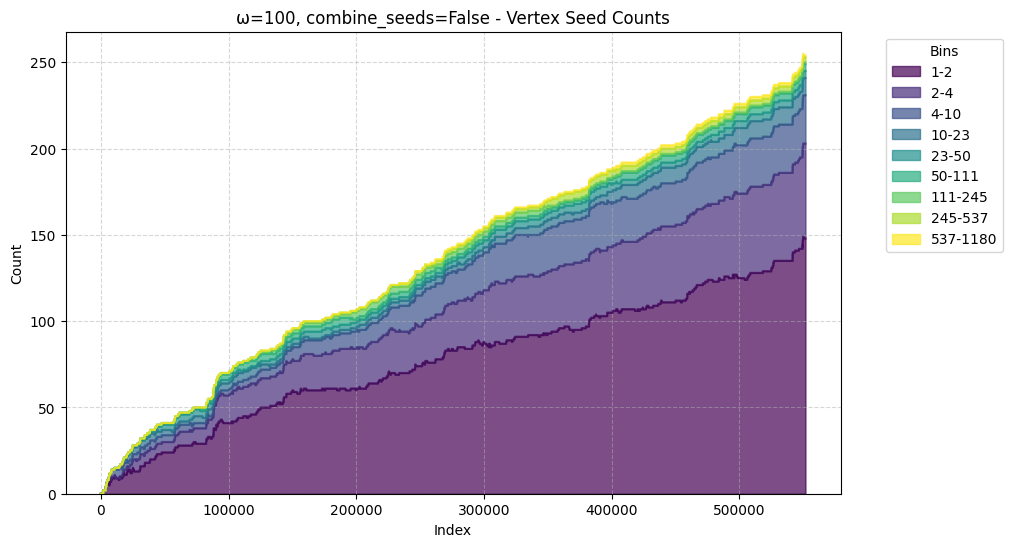

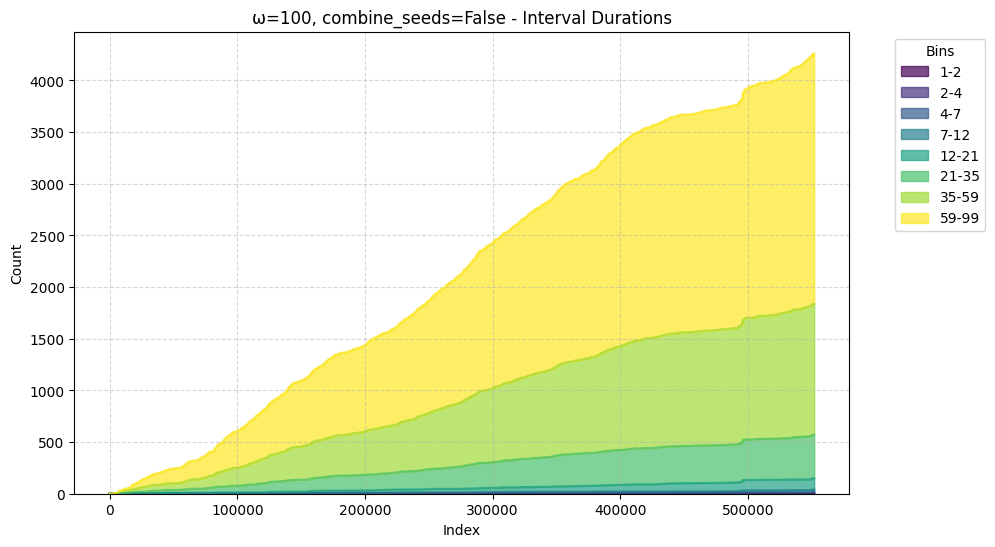

  0%|          | 0/551830 [00:00<?, ?it/s]

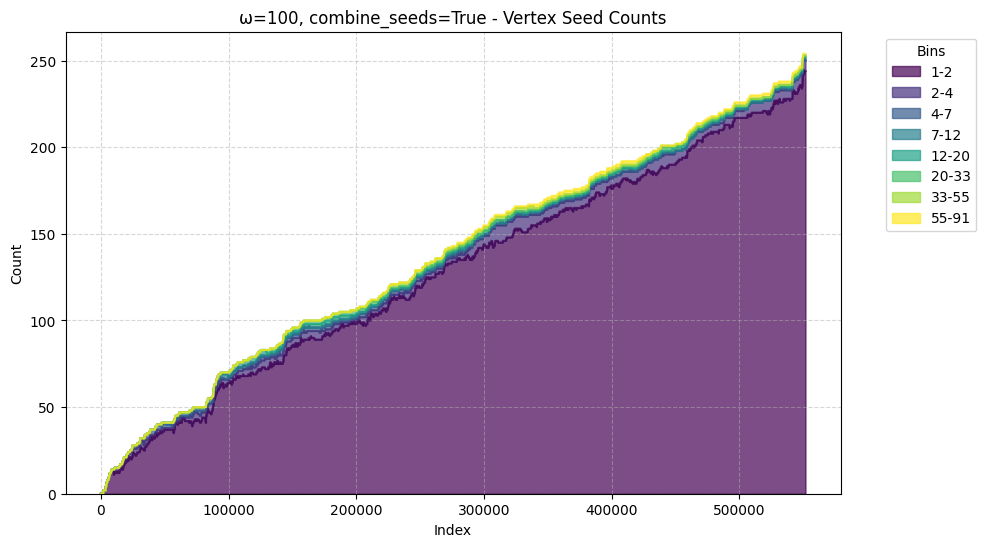

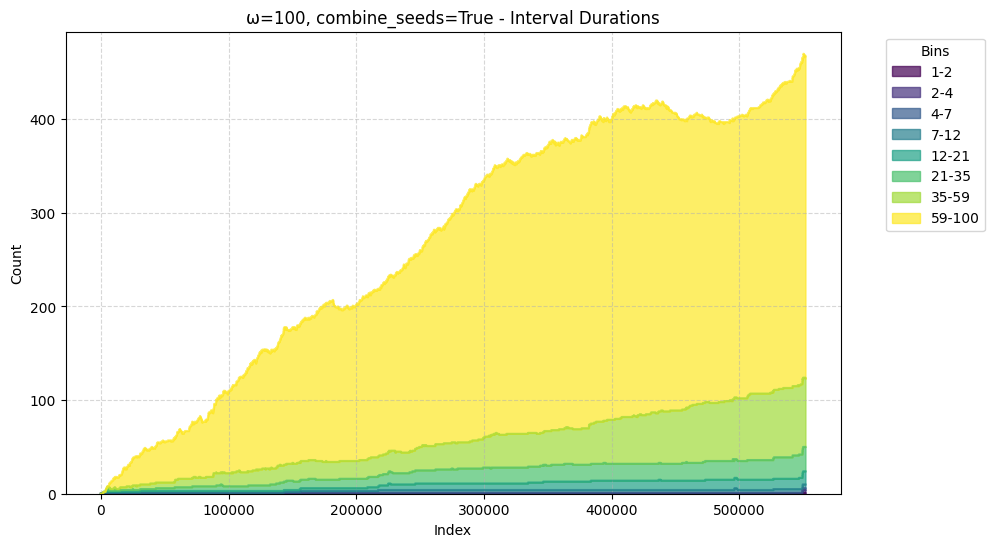

In [5]:

from plotting import process_data_for_plot, plot_stacked_area

for omega in tqdm((10, 25, 50, 100)):
    for combine_seeds in (False, True):
        iterator = cycle_generator(omega, combine_seeds=combine_seeds, track_history=True)
        list(iterator)
        title_prefix = f"ω={omega}, combine_seeds={combine_seeds}"
        # Process and plot
        plot_stacked_area(
            process_data_for_plot(iterator.vertex_seed_sizes_history),
            title=f"{title_prefix} - Vertex Seed Counts"
        )
        plot_stacked_area(
            process_data_for_plot(iterator.interval_durations_history),
            title=f"{title_prefix} - Interval Durations"
        )
